# K-Nearest-Neighbours

### Regression

#### When

KNN can be used in the case of missing values or in the case of regression to get a smoother fitted line. 

#### How

KNN makes use of the labels of the k-nearest-neighbours of an observation to make predictions for this observation. 

If you have observations $x_i = (x_{i,1},x_{i,2},...,x_{i,k})\text{ }i \in \{1,...,n\}$ and want to find the k-nearest-neighbours for $x_j$ you can use $\sqrt{\sum_{i=1}^n(x_i-y_i)^2)}$ to compute the Eucledian distance from this vector (observation) to all other observations. 

Then you pick the k nearest ones and take the average of the target variable as the prediction for $x_j$.

It is also possible to use a weighted average, where closer neighbours have a higher weight.

### Classification

For classification the only thing that changes is that you do not take the average of the target variable of the k-nearest-neighbours but you take the mode.

Import Libraries

In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from collections import Counter

import matplotlib.pyplot as plt

Make Functions

In [2]:
def EucledianDistance(v1, v2):
    return np.sqrt(np.sum(v1-v2)**2)

def Accuracy(y_test, y_pred):
    acc = np.sum(y_test == y_pred)/len(y_test)
    return acc

Create K-Nearest-Neigbours class

In [3]:
class KNN:
    
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict_y(self, x):
        dist = [EucledianDistance(x, v) for v in self.X_train]
        k_nearest_indices = np.argsort(dist)[:self.k]
        k_nearest_labels = [self.y_train[ind] for ind in k_nearest_indices]
        return Counter(k_nearest_labels).most_common(1)[0][0]
        
    def predict(self, X):
        y_pred = [self.predict_y(x) for x in X]
        return np.array(y_pred)

Load Data

In [4]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Use Model and Show Accuracy

In [5]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"The accuracy is {Accuracy(y_test, y_pred)}")

The accuracy is 0.8666666666666667


Show Accuracy for Different K

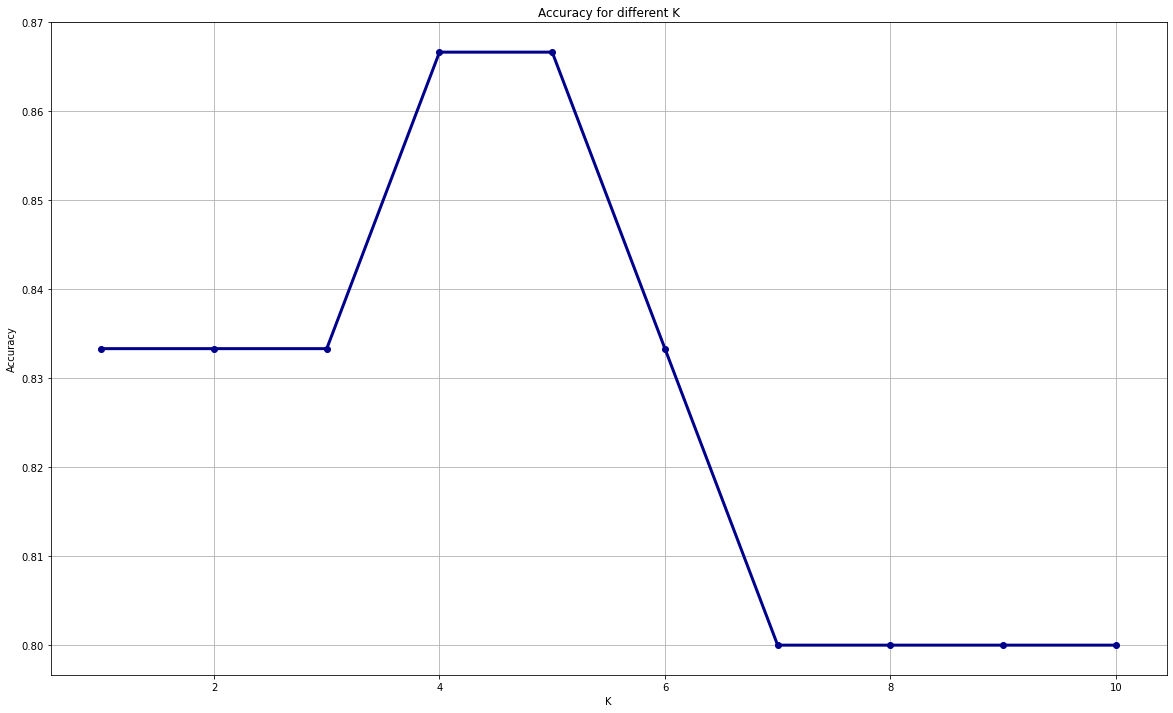

In [6]:
x_val = range(1,11)
y_val = []

for K in x_val:
    clf = KNN(k=K)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_val.append(Accuracy(y_test, y_pred))

plt.figure(figsize=(20, 12))
plt.plot(x_val, y_val, 'bo-', color="darkblue", linewidth=3)
plt.xlabel('K'); plt.ylabel('Accuracy')
plt.title('Accuracy for different K')
plt.grid()